In [157]:
#set up the environment
import pandas as pd
import seaborn as sns  #statist graph package
import matplotlib.pyplot as plt  #plot package
from scipy.stats import spearmanr #cor test package
import numpy as np

df = pd.read_csv('clean_data.csv')
df.shape

(10997, 22)

In [163]:
df.columns

Index(['Unnamed: 0', 'id', 'Locality', 'Type of property',
       'Subtype of property', 'Type of sale', 'Fully equipped kitchen',
       'Fireplace', 'Terrace', 'Garden', 'Garden area', 'Surface of the land',
       'Surface area of the plot of land', 'Swimming pool',
       'State of the building', 'Compound Listing', 'Price', 'Number of rooms',
       'Living Area', 'Furnished', 'Terrace area', 'Number of facades'],
      dtype='object')

                                  Locality  Type of property  \
Locality                          1.000000          0.204519   
Type of property                  0.204519          1.000000   
Subtype of property               0.130687          0.913772   
Fully equipped kitchen           -0.226886          0.071773   
Fireplace                         0.001951          0.181697   
Terrace                          -0.070271         -0.127996   
Garden                           -0.014864          0.444856   
Garden area                      -0.006648          0.464807   
Surface area of the plot of land  0.209821          0.951403   
Swimming pool                     0.009359          0.079109   
State of the building            -0.045976          0.057511   
Compound Listing                 -0.102459         -0.585519   
Price                            -0.120734          0.144881   
Number of rooms                   0.127721          0.654153   
Living Area                       0.1348

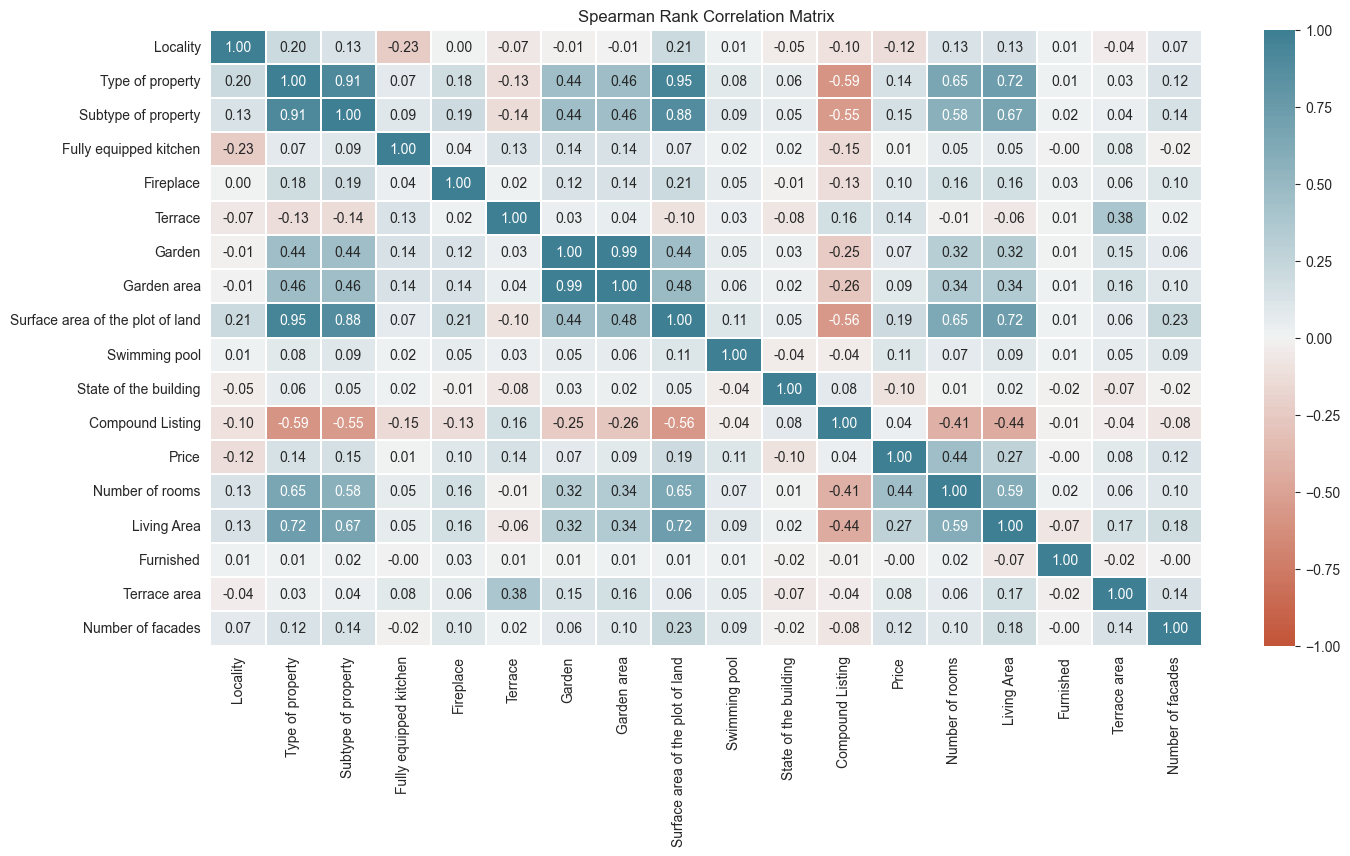

In [159]:

#creating a dataset without str
def ordinalEncode(entry, categories):
    for index, category in enumerate(categories):
        if entry == category:
            return index
final_data = df.copy()
columns_to_be_encoded = ['Type of property', 'Subtype of property', 'Type of sale', 'State of the building', 'Compound Listing']
for column in columns_to_be_encoded:
    final_data[column] = df[column].apply(lambda el: ordinalEncode(el, df[column].unique()))

#remove the columns that we don't need   
final_data = final_data.drop(['Unnamed: 0', 'id', 'Type of sale','Surface of the land'], axis=1)


#correlation test
corr, p_value = spearmanr(final_data)
# Convert the correlation matrix to a DataFrame for better visualization
corr_df = pd.DataFrame(corr, columns=final_data.columns, index=final_data.columns)
print(corr_df)

print("\nP-values of the correlation test:")
print(p_value)

# Plot the Spearman correlation matrix as a heatmap
plt.subplots(figsize=(16, 8))   
sns.heatmap(corr_df, annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))
plt.title("Spearman Rank Correlation Matrix")
plt.savefig('corr-matrix.png')
plt.show()

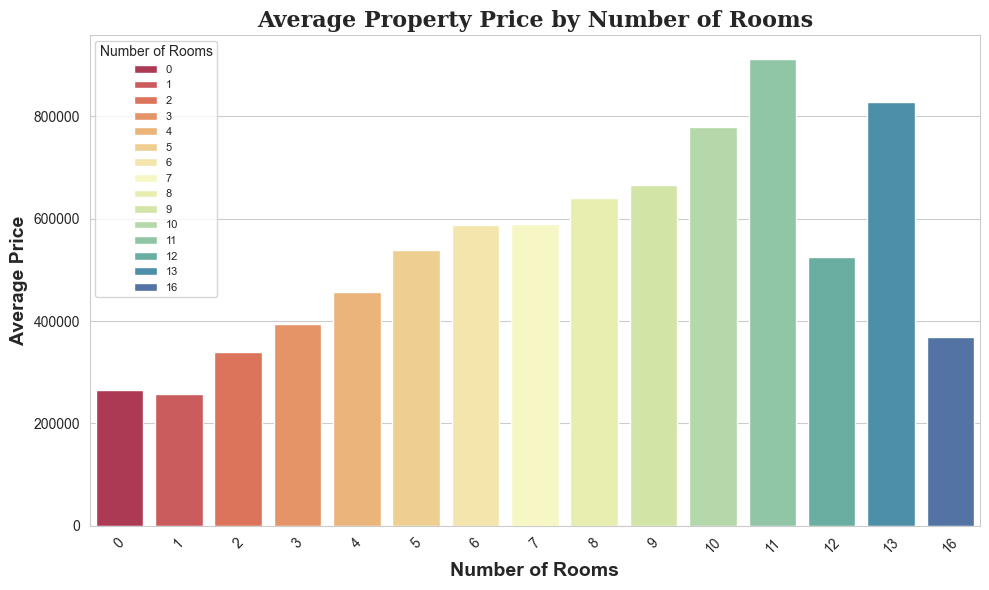

In [164]:
df['Number of rooms'] = df['Number of rooms'].astype(int)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(
    x="Number of rooms", 
    y="Price", 
    data=df, 
    estimator=np.mean, 
    errorbar=None,  
    palette=sns.color_palette("Spectral", n_colors=df["Number of rooms"].nunique()),  # Vibrant color palette
    hue="Number of rooms",  
    dodge=False  
)

plt.title("Average Property Price by Number of Rooms", fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel("Number of Rooms", fontsize=14, fontweight='bold')
plt.ylabel("Average Price", fontsize=14, fontweight='bold')

plt.legend(title="Number of Rooms", loc="upper left", fontsize=8, title_fontsize=10)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('price_vs_rooms.png')
plt.show()

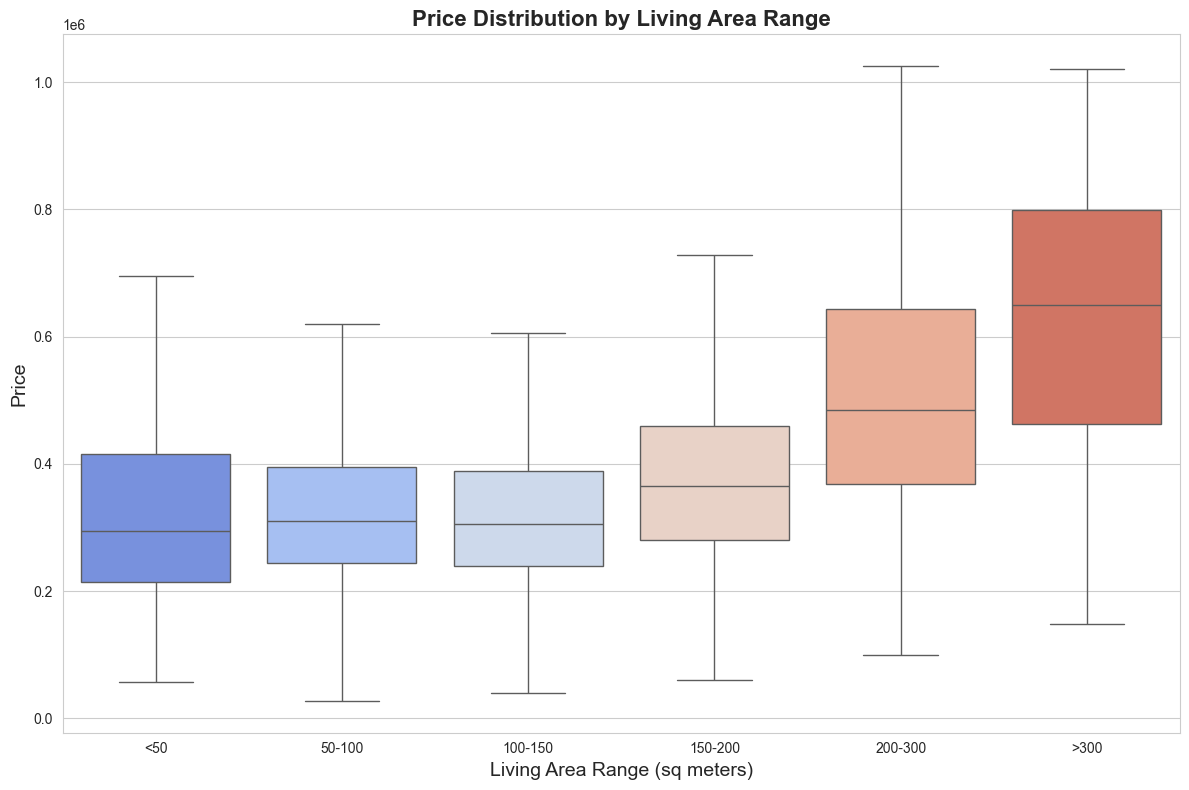

In [138]:
df['Living Area Range'] = pd.cut(
    df['Living Area'], 
    bins=[0, 50, 100, 150, 200, 300, 500], 
    labels=["<50", "50-100", "100-150", "150-200", "200-300", ">300"]
)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

sns.boxplot(
    x="Living Area Range", 
    y="Price", 
    data=df, 
    hue="Living Area Range", 
    palette="coolwarm", 
    showfliers=False,
    dodge=False  
)
plt.title("Price Distribution by Living Area Range", fontsize=16, fontweight='bold')
plt.xlabel("Living Area Range (sq meters)", fontsize=14)
plt.ylabel("Price", fontsize=14)

plt.legend([], [], frameon=False)
plt.tight_layout()
plt.savefig('privr_vs_larea.png')
plt.show()


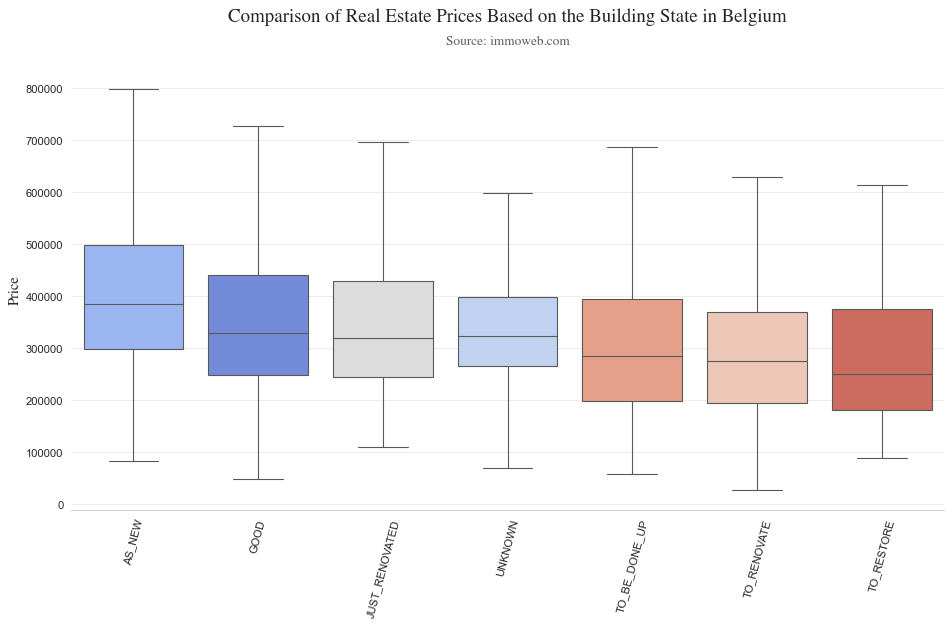

In [140]:
sns.set_style("whitegrid")
# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8), dpi=80)

# Sort categories by the mean price
my_order = df.groupby(by=["State of the building"])["Price"].mean().sort_values(ascending=False).index

box_plot = sns.boxplot(
    x="State of the building", 
    y="Price", 
    data=df, 
    order=my_order, 
    showfliers=False, 
    palette=sns.color_palette("coolwarm", n_colors=len(my_order)),  
    hue="State of the building", 
    dodge=False  
)

plt.ylabel('Price', fontsize=13, fontweight='bold', fontfamily='times')
plt.xlabel('')
ax.text(
    x=0.5, y=1.1, 
    s='Comparison of Real Estate Prices Based on the Building State in Belgium', 
    fontfamily='times', fontsize=17, weight='bold', 
    ha='center', va='bottom', transform=ax.transAxes
)
ax.text(
    x=0.5, y=1.05, 
    s='Source: immoweb.com', 
    fontsize=12, alpha=0.75, ha='center', 
    fontfamily='times', va='bottom', transform=ax.transAxes
)

ax.tick_params(axis='x', rotation=75)

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.4)
box_plot.figure.tight_layout()
plt.savefig('price_vs_state.png')

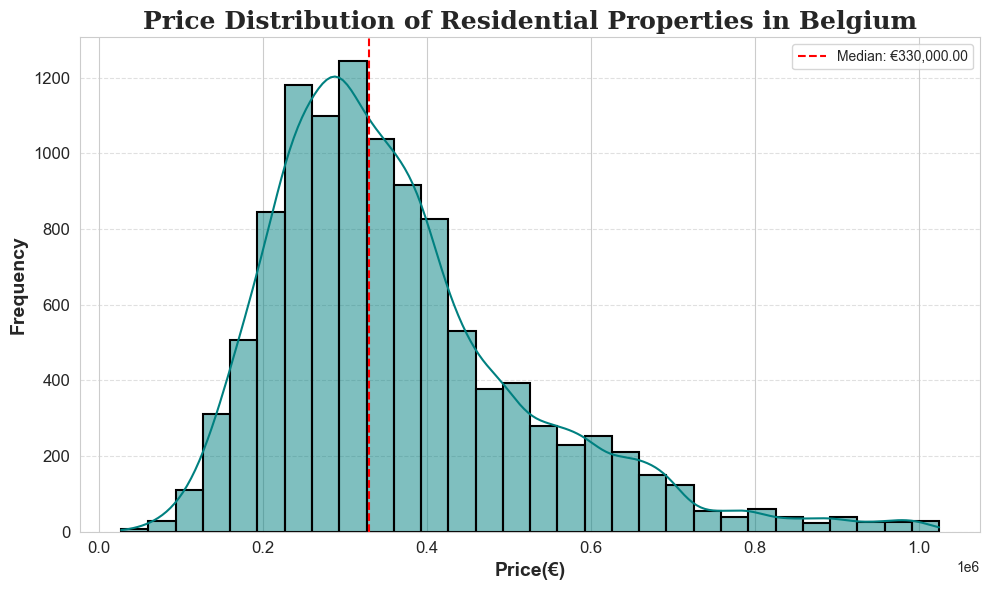

<Figure size 640x480 with 0 Axes>

In [165]:

x = df['Price']
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(x, bins=30, kde=True, color='teal', edgecolor='black', linewidth=1.5)

plt.title("Price Distribution of Residential Properties in Belgium", fontsize=18, fontweight='bold', family='serif')
plt.xlabel("Price(€)", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)  

median_price = x.median()
plt.axvline(median_price, color='red', linestyle='--', label=f'Median: €{median_price:,.2f}')
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('price_distribution.png')

In [ ]:
categorical_columns = df[['Type of property','Subtype of property', 'Type of sale', 
                      'State of the building', 'Compound Listing', 'Fully equipped kitchen',
                    'Furnished', 'Fireplace', 'Terrace', 'Garden', 'Swimming pool']]
continuous_columns= df[['Price', 'Number of rooms', 'Living Area', 'Terrace area', 'Garden area',
                      'Surface of the land','Surface area of the plot of land', 'Number of facades']]

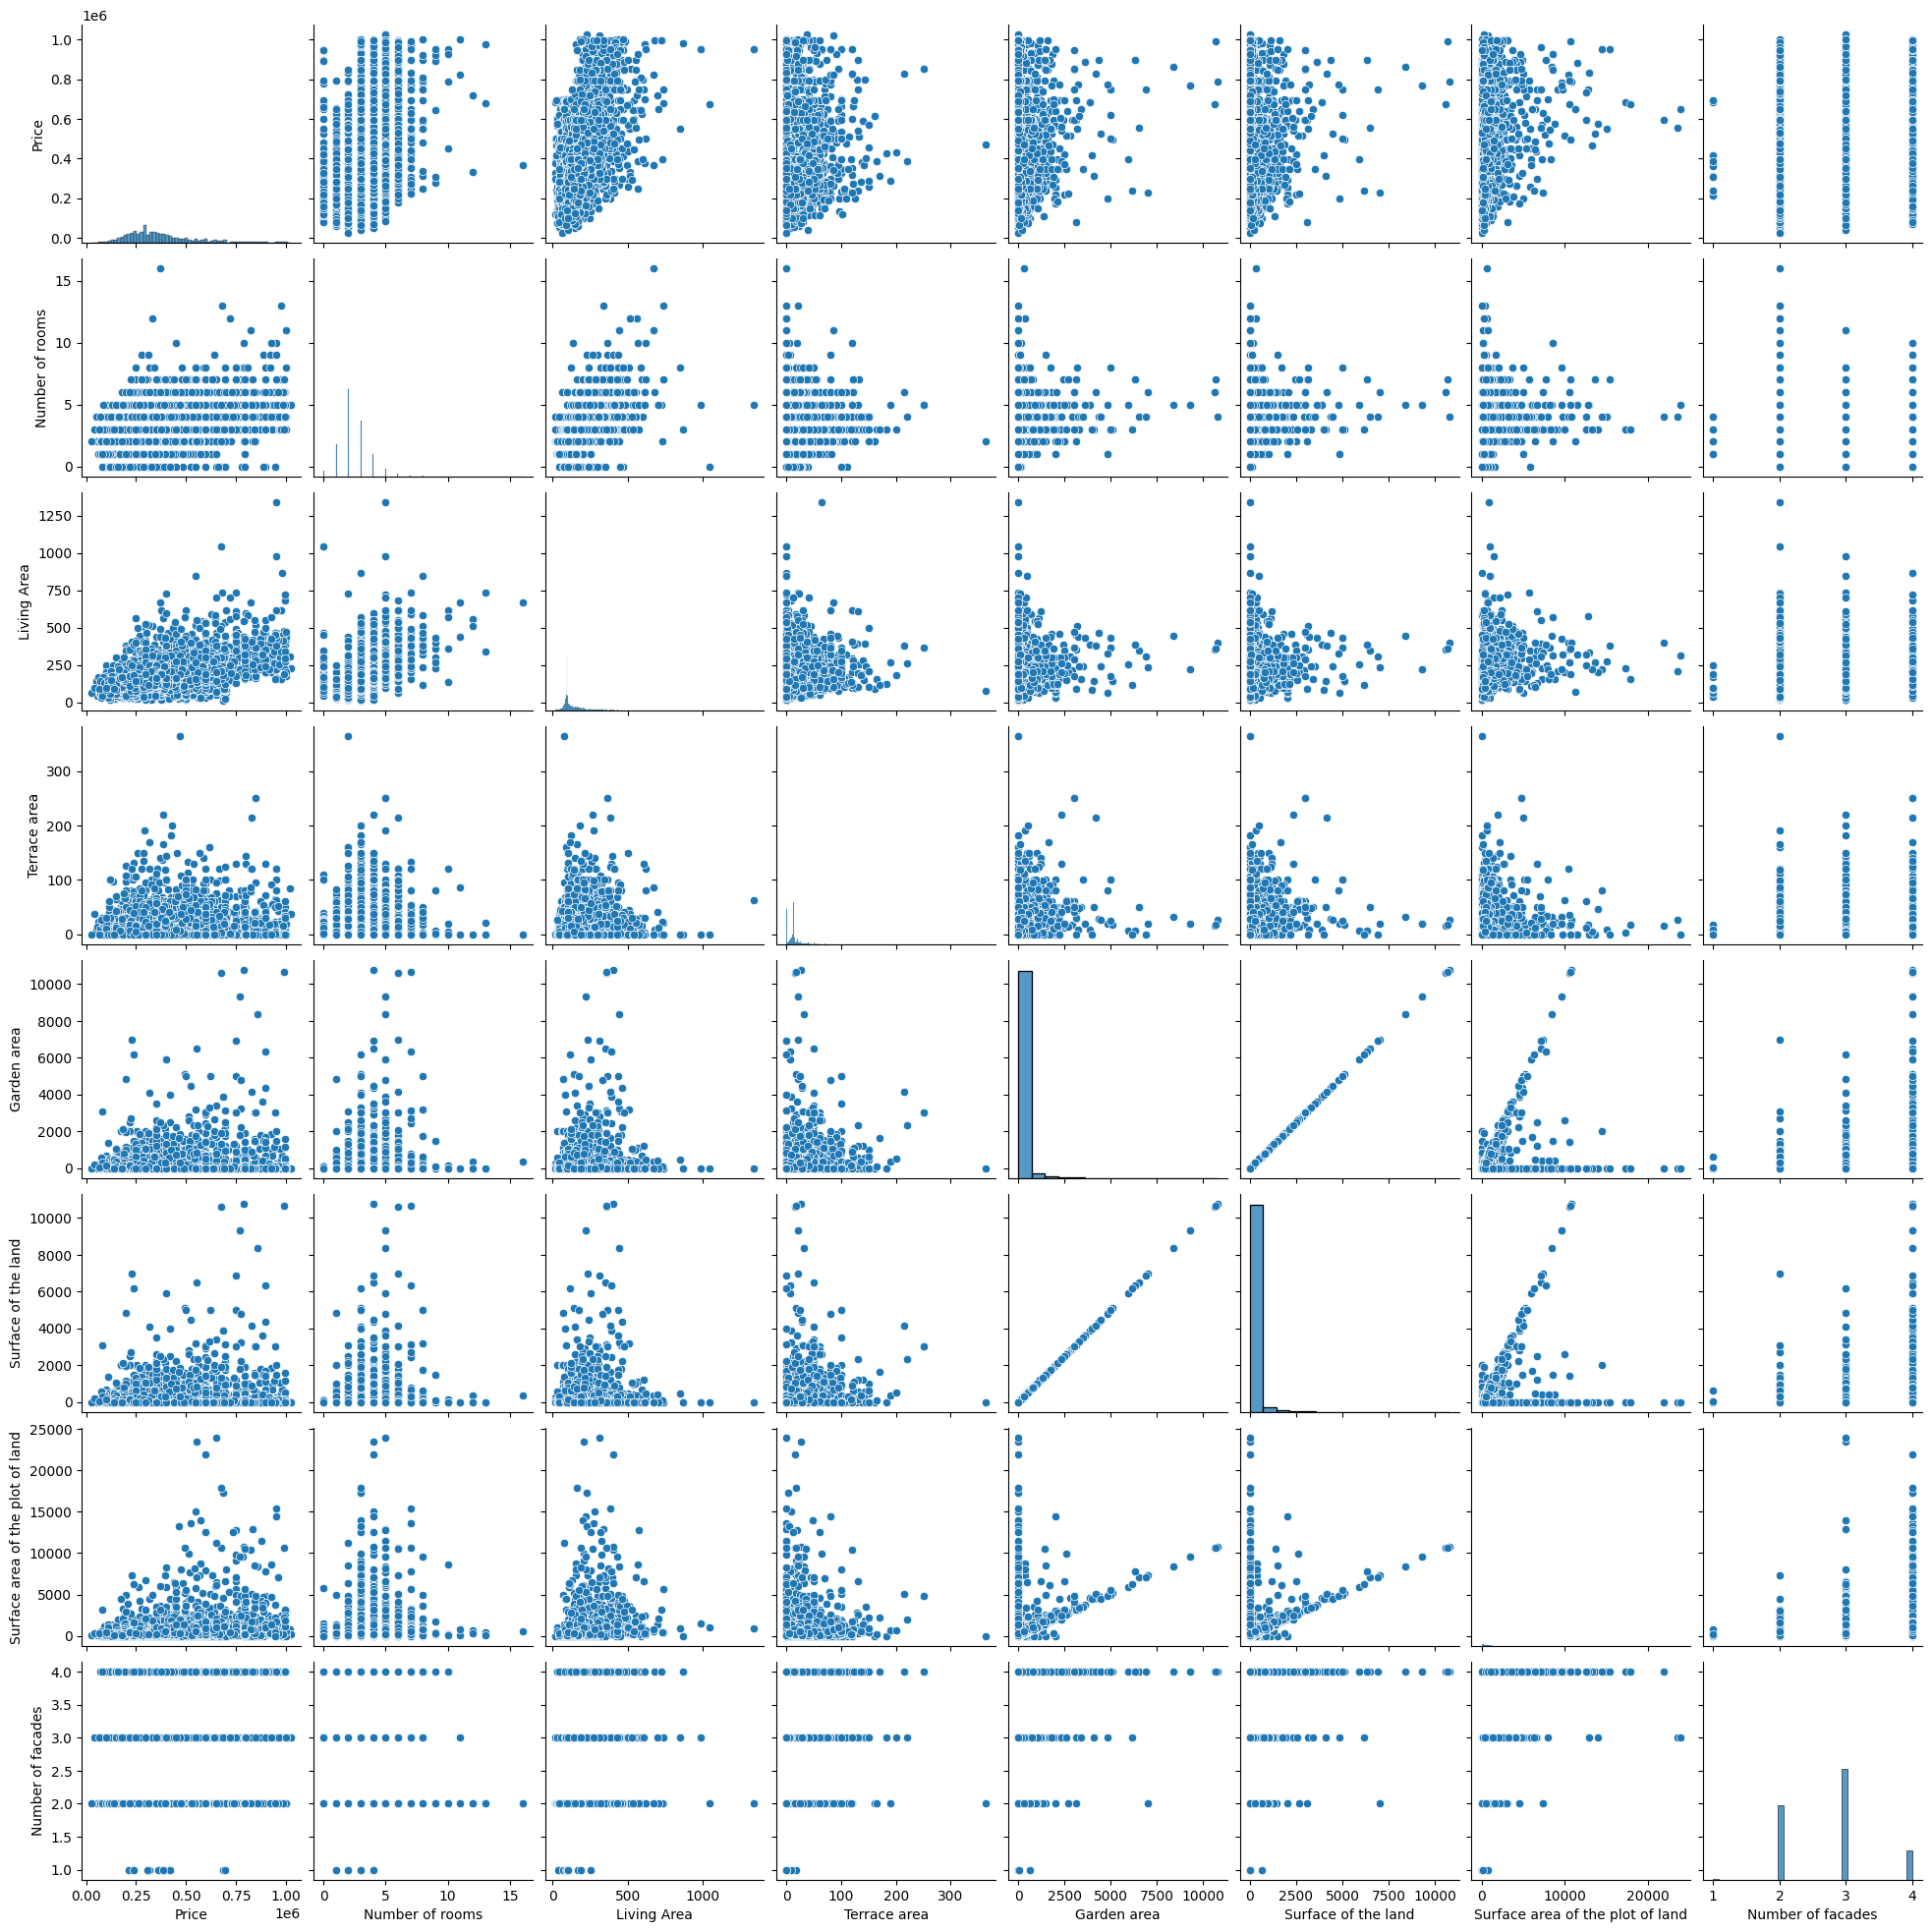

In [ ]:
#to get an idea of all data corr 
sns.pairplot(df, vars= continuous_columns )
plt.show()

In [9]:
corr_result = continuous_columns.corr(method='pearson')
corr_result

,Price,Number of rooms,Living Area,Terrace area,Garden area,Surface of the land,Surface area of the plot of land,Number of facades
Price,1.000000,0.464521,0.466505,0.149775,0.161547,0.161547,0.277513,0.160536
Number of rooms,0.464521,1.000000,0.649824,0.164663,0.231718,0.231718,0.316507,0.112713
Living Area,0.466505,0.649824,1.000000,0.206022,0.255553,0.255553,0.415030,0.197387
Terrace area,0.149775,0.164663,0.206022,1.000000,0.217426,0.217426,0.158016,0.141196
Garden area,0.161547,0.231718,0.255553,0.217426,1.000000,1.000000,0.448750,0.209114
Surface of the land,0.161547,0.231718,0.255553,0.217426,1.000000,1.000000,0.448750,0.209114
Surface area of the plot of land,0.277513,0.316507,0.415030,0.158016,0.448750,0.448750,1.000000,0.293004
Number of facades,0.160536,0.112713,0.197387,0.141196,0.209114,0.209114,0.293004,1.000000


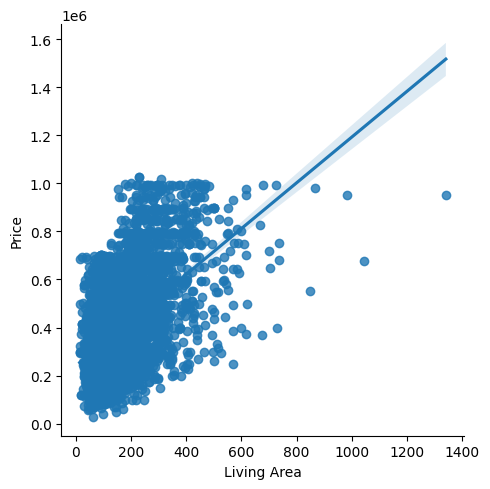

In [10]:
sns.lmplot(df, x = 'Living Area', y='Price')
plt.show()

<Axes: >

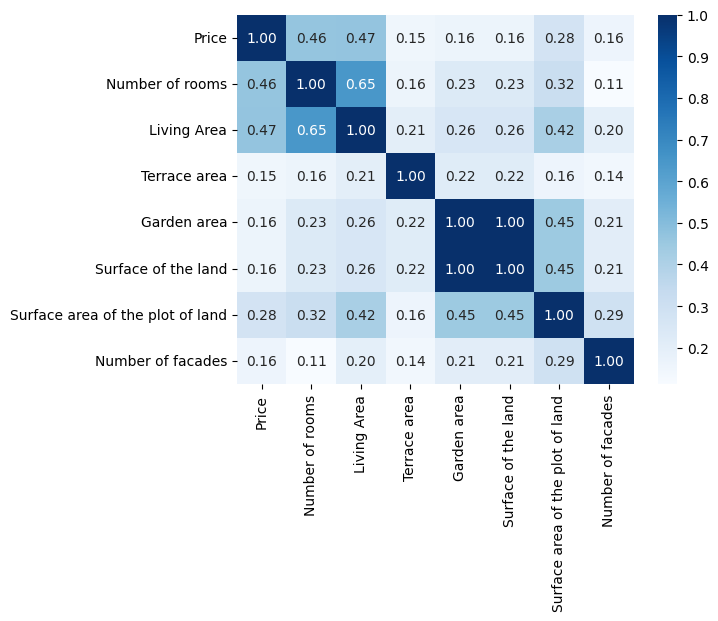

In [11]:
sns.heatmap(corr_result, annot=True, cmap='Blues', fmt='.2f')

In [13]:
import pandas as pd
from scipy.stats import spearmanr

continuous_columns= df[['Price', 'Number of rooms', 'Living Area', 'Terrace area', 'Garden area',
                      'Surface of the land','Surface area of the plot of land', 'Number of facades']]


corr, p_value = spearmanr(continuous_columns)

# Convert the correlation matrix to a DataFrame for better visualization
corr_df = pd.DataFrame(corr, columns=continuous_columns.columns, index=continuous_columns.columns)

# Display the correlation matrix
print(corr_df)


print("\nP-values of the correlation test:")
print(p_value)


                                     Price  Number of rooms  Living Area  \
Price                             1.000000         0.438632     0.268146   
Number of rooms                   0.438632         1.000000     0.590662   
Living Area                       0.268146         0.590662     1.000000   
Terrace area                      0.080446         0.063685     0.168517   
Garden area                       0.085137         0.338394     0.342399   
Surface of the land               0.085137         0.338394     0.342399   
Surface area of the plot of land  0.194478         0.647239     0.724848   
Number of facades                 0.121273         0.097360     0.182927   

                                  Terrace area  Garden area  \
Price                                 0.080446     0.085137   
Number of rooms                       0.063685     0.338394   
Living Area                           0.168517     0.342399   
Terrace area                          1.000000     0.164986   


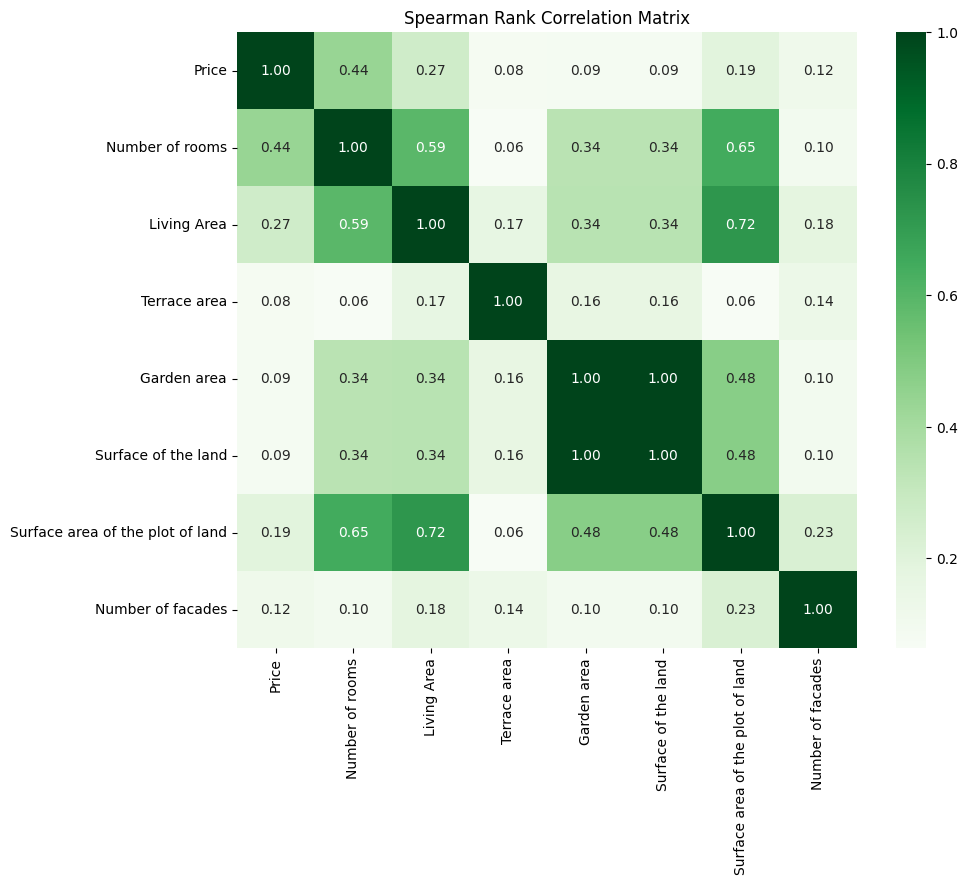

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the Spearman correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap="Greens", fmt=".2f", cbar=True)
plt.title("Spearman Rank Correlation Matrix")
plt.show()


In [16]:
for i in categorical_columns:
    print(f"df[{i}] = df[{i}].astype('category').cat.codes")

df[Type of property] = df[Type of property].astype('category').cat.codes
df[Subtype of property] = df[Subtype of property].astype('category').cat.codes
df[Type of sale] = df[Type of sale].astype('category').cat.codes
df[State of the building] = df[State of the building].astype('category').cat.codes
df[Compound Listing] = df[Compound Listing].astype('category').cat.codes
df[Fully equipped kitchen] = df[Fully equipped kitchen].astype('category').cat.codes
df[Furnished] = df[Furnished].astype('category').cat.codes
df[Fireplace] = df[Fireplace].astype('category').cat.codes
df[Terrace] = df[Terrace].astype('category').cat.codes
df[Garden] = df[Garden].astype('category').cat.codes
df[Swimming pool] = df[Swimming pool].astype('category').cat.codes


In [17]:
df['Type of property'] = df['Type of property'].astype('category').cat.codes
df['Subtype of property'] = df['Subtype of property'].astype('category').cat.codes
df['Type of sale'] = df['Type of sale'].astype('category').cat.codes
df['State of the building'] = df['State of the building'].astype('category').cat.codes
df['Compound Listing'] = df['Compound Listing'].astype('category').cat.codes
df['Fully equipped kitchen'] = df['Fully equipped kitchen'].astype('category').cat.codes
df['Furnished'] = df['Furnished'].astype('category').cat.codes
df['Fireplace'] = df['Fireplace'].astype('category').cat.codes
df['Terrace'] = df['Terrace'].astype('category').cat.codes
df['Garden'] = df['Garden'].astype('category').cat.codes
df['Swimming pool'] = df['Swimming pool'].astype('category').cat.codes

In [20]:
from pingouin import anova
import pandas as pd

categorical_columns = ['Type of property', 'Subtype of property', 'Type of sale', 
                       'State of the building', 'Compound Listing', 'Fully equipped kitchen',
                       'Furnished', 'Fireplace', 'Terrace', 'Garden', 'Swimming pool']

anova_results = []

# Perform ANOVA for each categorical variable
for col in categorical_columns:
    try:
        result = anova(dv='Price', between=col, data=df)
        anova_results.append({'Categorical Variable': col, 'p-value': result['p-unc'].iloc[0]})
    except Exception as e:
        anova_results.append({'Categorical Variable': col, 'p-value': None, 'Error': str(e)})


anova_df = pd.DataFrame(anova_results)
print(anova_df)


      Categorical Variable        p-value    Error
0         Type of property  3.648823e-106      NaN
1      Subtype of property   0.000000e+00      NaN
2             Type of sale            NaN  'p-unc'
3    State of the building   1.539459e-89      NaN
4         Compound Listing   3.236686e-05      NaN
5   Fully equipped kitchen   9.150074e-02      NaN
6                Furnished   1.022317e-01      NaN
7                Fireplace   4.829005e-39      NaN
8                  Terrace   1.677774e-30      NaN
9                   Garden   2.445520e-26      NaN
10           Swimming pool   5.636168e-57      NaN


/Users/fatemehsoltanzade/Becode/ImmoData-EDA/.venv/lib/python3.12/site-packages/pingouin/parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  msbetween = ssbetween / ddof1


In [ ]:
#Beased on the result this test does not seem valid so I try another method

## Kruskal-Wallis test 
is a non-parametric test and an alternative to One-Way Anova. By non-parametric we mean, the data is not assumed to become from a particular distribution. The main objective of this test is used to determine whether there is a statistical difference between the medians of at least three independent groups. 
### Hypothesis:
The Kruskal-Wallis Test has the null and alternative hypotheses as discussed below:

The null hypothesis (H0): The median is the same for all the data groups.
The alternative hypothesis: (Ha): The median is not equal for all the data groups.

In [21]:
import pandas as pd
from scipy.stats import kruskal

results = []

categorical_data = df[['Type of property', 'Subtype of property', 
                       'State of the building', 'Compound Listing', 'Fully equipped kitchen',
                       'Furnished', 'Fireplace', 'Terrace', 'Garden', 'Swimming pool']] 

continuous_data = df[['Price']]

for cat_col in categorical_data.columns:
    # Get unique categories for this categorical variable
    categories = df[cat_col].unique()

    # Group the 'Price' data by the categorical variable
    groups = [df[df[cat_col] == category]['Price'] for category in categories]
    stat, p_value = kruskal(*groups)
    
    if p_value < 0.05:
        Difference = "Significant"
    else:
        Difference = "Not Significant"
    results.append({
        "Categorical Variable": cat_col,
        "H-statistic": stat,
        "P-value": p_value,
        "Difference": Difference
    })

results_df = pd.DataFrame(results)
print(results_df)


     Categorical Variable  H-statistic        P-value       Difference
0        Type of property   230.812016   3.965123e-52      Significant
1     Subtype of property  1275.100902  5.133558e-257      Significant
2   State of the building   572.627987  1.866815e-120      Significant
3        Compound Listing    13.673209   2.175359e-04      Significant
4  Fully equipped kitchen     0.284346   5.938670e-01  Not Significant
5               Furnished     0.179701   6.716305e-01  Not Significant
6               Fireplace   110.434644   7.869766e-26      Significant
7                 Terrace   219.310900   1.278483e-49      Significant
8                  Garden    57.369500   3.611648e-14      Significant
9           Swimming pool   134.061106   5.297954e-31      Significant


In [ ]:
# I had to remove 'Type of Sale' as it has only one category

### Box plot 
shows the data distribution of the continuous variable for each category. If the distribution for each of the categories is similar, which means the boxes are aligned, then, it indicates no correlation.

Similarly, if the data distribution is different for each category, which means the boxes are far from each other, then, it indicates that there is a correlation between the two variables.

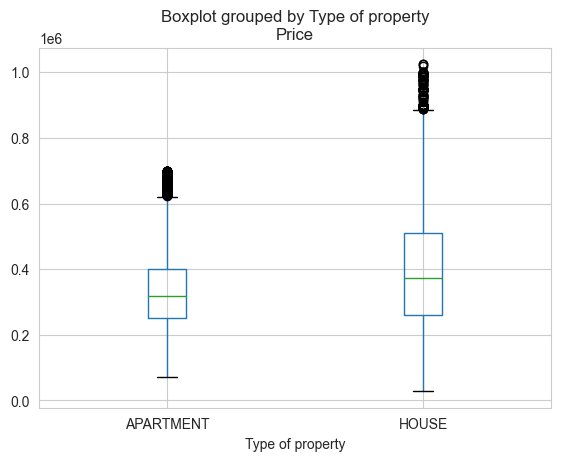

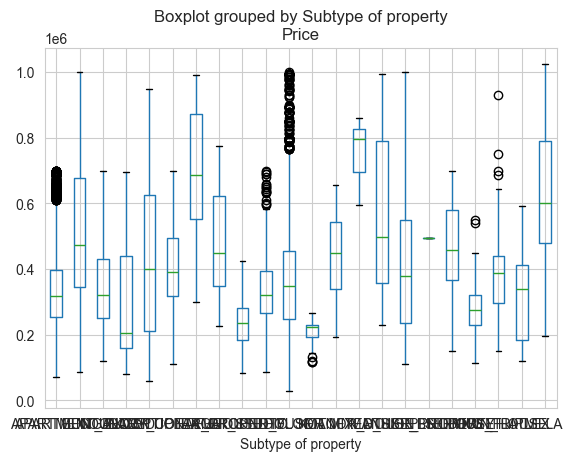

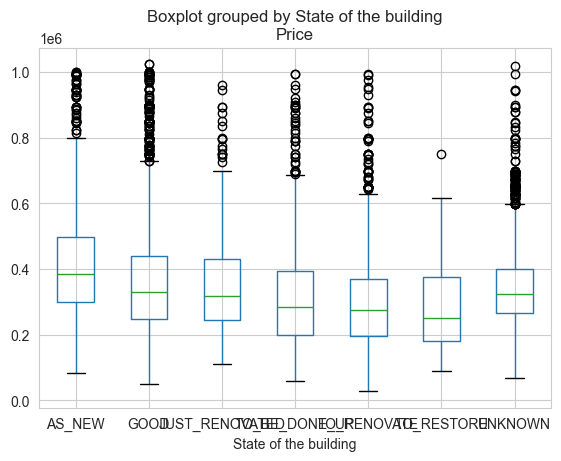

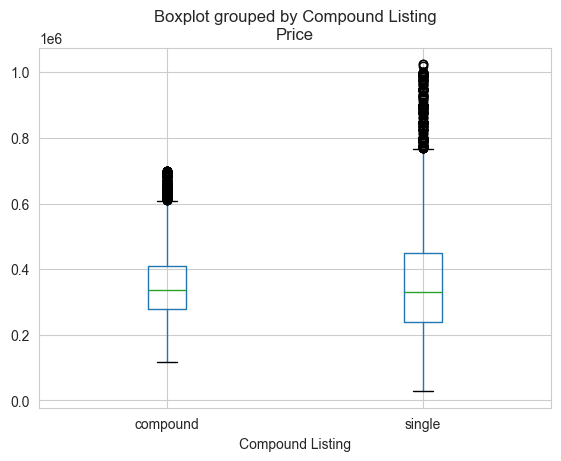

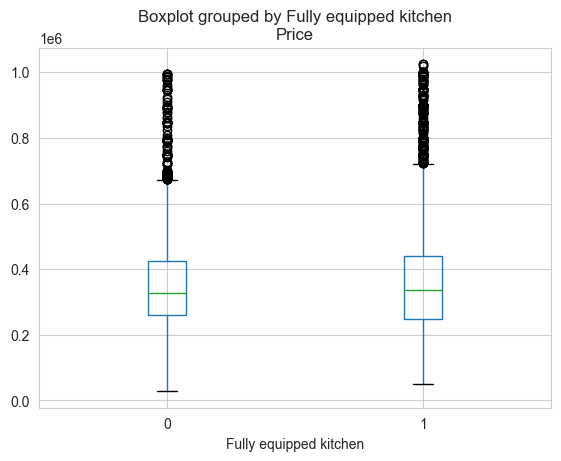

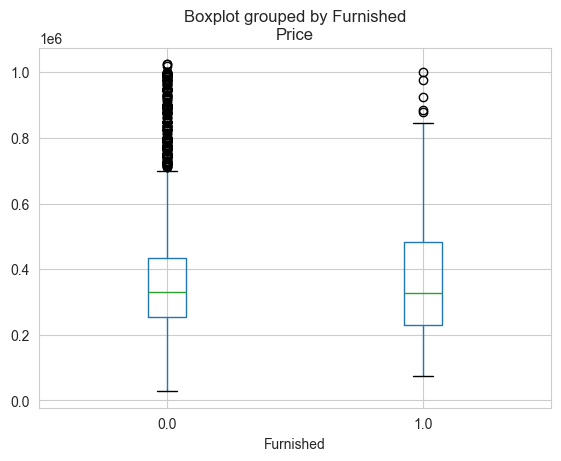

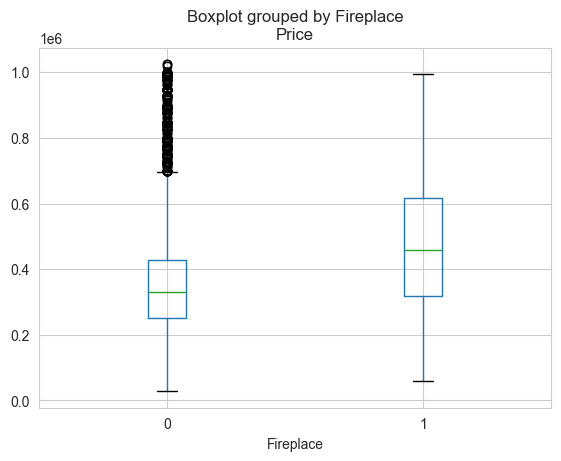

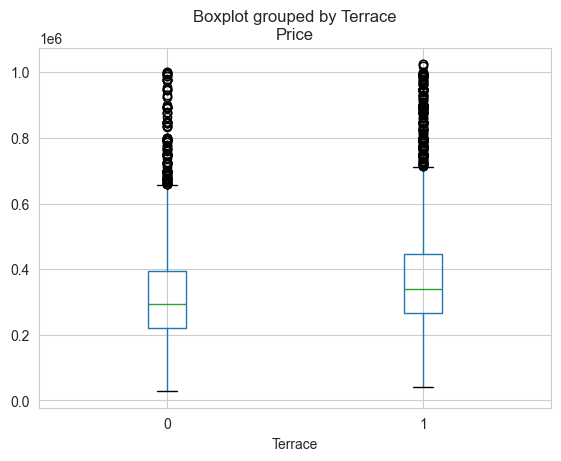

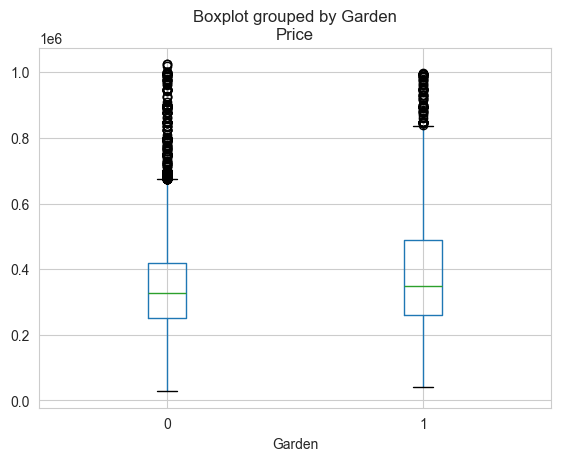

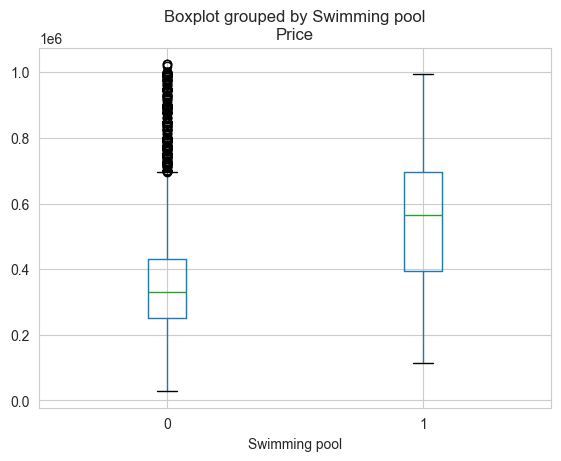

In [126]:
for col in categorical_data:
    df.boxplot(column="Price", by =col)
    plt.show()

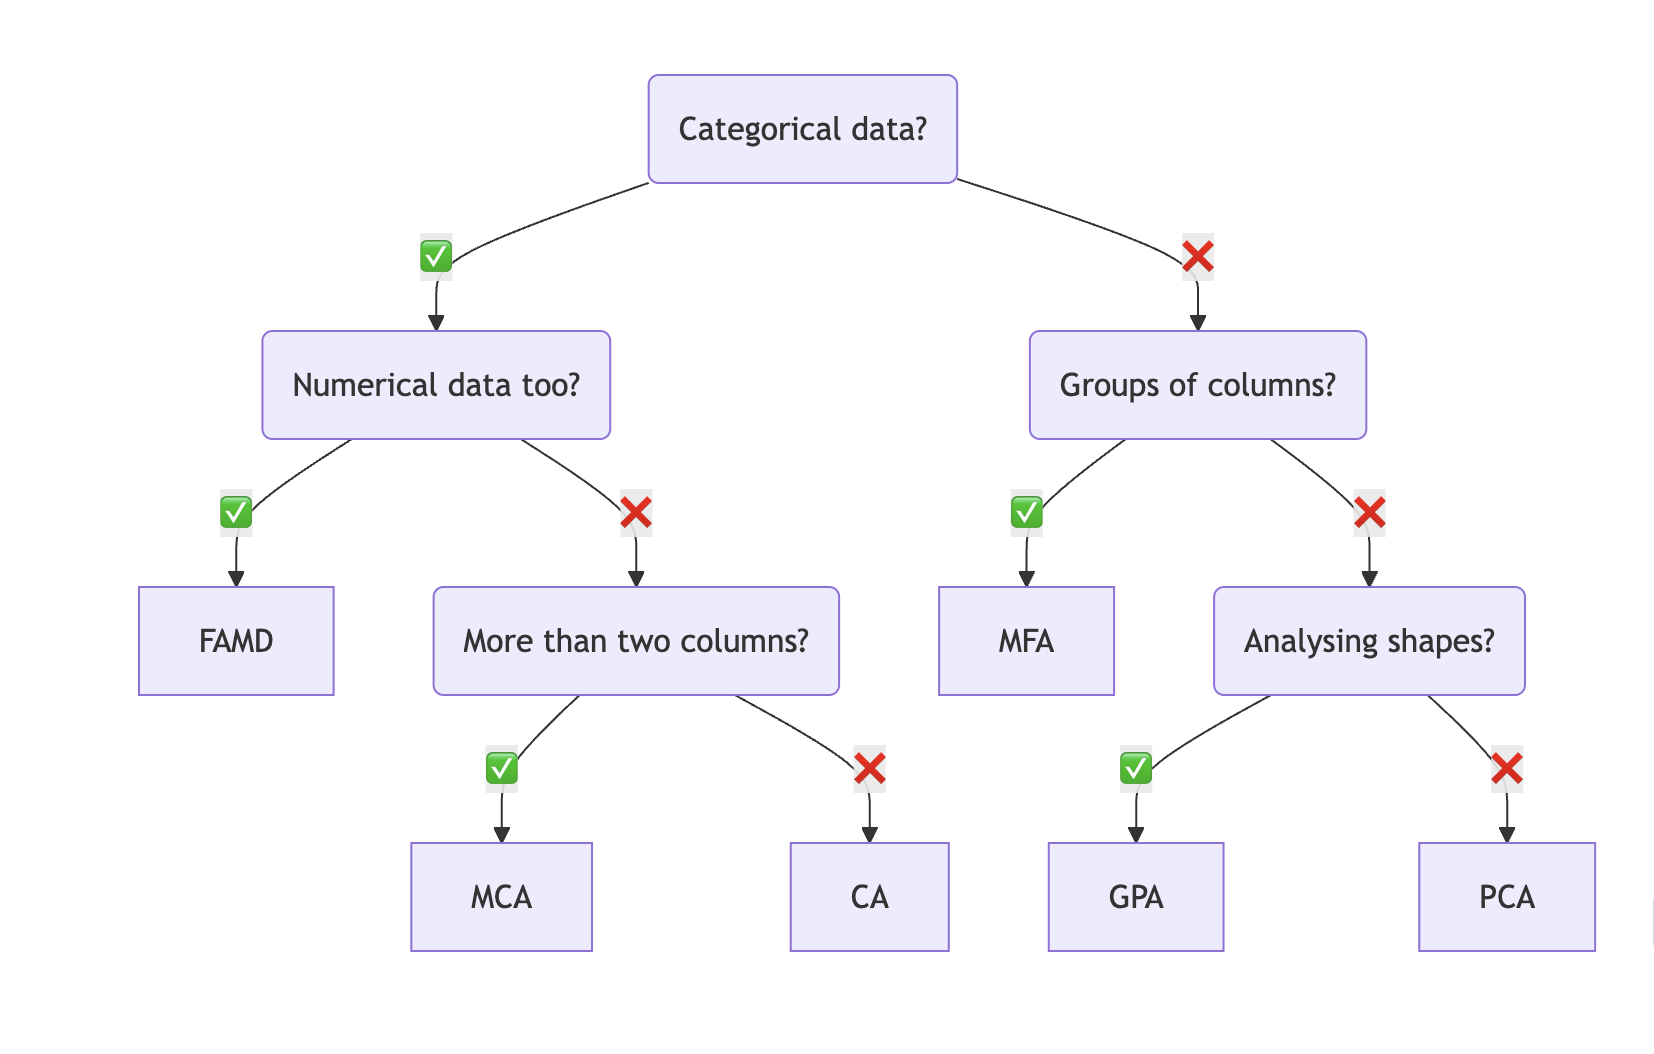

## Factorial Analysis of Mixed Data (FAMD) 
is a statistical method used to analyze datasets containing both categorical and numerical variables. It is particularly useful in exploratory data analysis for reducing dimensionality while preserving relationships in the data. In Python, you can use the prince library to perform FAMD or light famd.

Reduced Data (Row Coordinates):
 component         0         1         2         3         4
0          0.934617  2.068876  0.321362 -0.683074  1.945381
1         -3.875899  2.469223  1.354356 -0.502238  0.191247
2         -3.474434  0.768980 -0.030243  0.388765  2.027567
3         -3.442976  0.824824 -0.064723  0.403628  2.032332
4         -3.156000  0.915854 -0.245685  0.401589  2.115551

Explained Variance (Percentage):
 [9.29071298 3.96213662 3.38333807 3.17555348 3.0671637 ]

Column Contributions:
 component                                    0             1             2  \
variable                                                                     
Garden area                       6.486741e-03  1.127532e-02  1.426022e-03   
Surface of the land               6.486741e-03  1.127532e-02  1.426022e-03   
Surface area of the plot of land  8.972496e-03  4.827117e-03  5.718743e-03   
Price                             2.136871e-03  1.302344e-02  5.084729e-03   
Number of rooms        

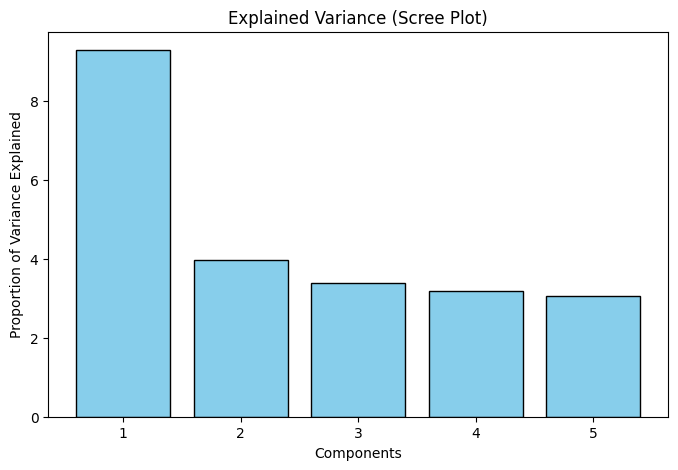

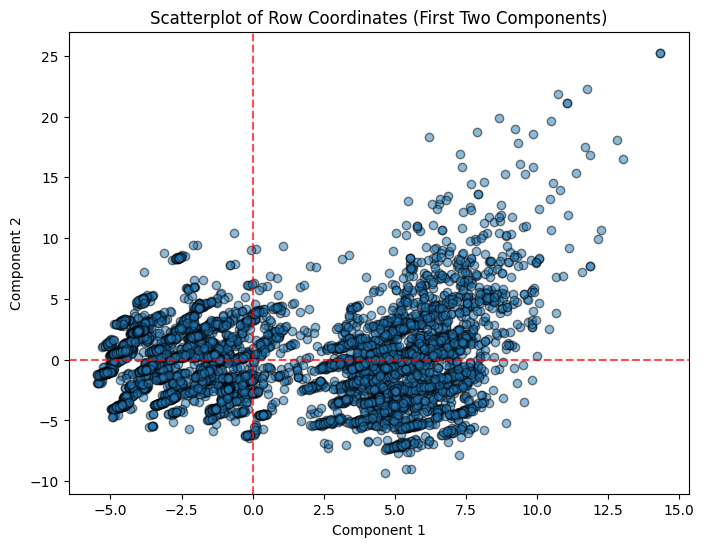

In [78]:
import prince
required_data = df.iloc[:, 3:]
famd = prince.FAMD(n_components=5, random_state=42)
famd = famd.fit(required_data)

# ------------------- Key Outputs -------------------

# 1. Reduced Data (Coordinates of Rows in Reduced Space)
row_coords = famd.row_coordinates(required_data)
print("Reduced Data (Row Coordinates):\n", row_coords.head())

#2. Explained Variance (Percentage of Variance Explained by Each Component)
explained_variance = famd.percentage_of_variance_
print("\nExplained Variance (Percentage):\n", explained_variance)

# 3. Variable Contributions to Each Component
column_contributions = famd.column_contributions_
print("\nColumn Contributions:\n", column_contributions)

# 4. Contribution of Observations to Components
row_contributions = famd.row_contributions_
print("\nRow Contributions:\n", row_contributions)

# 5. Coordinates of Categories (for Categorical Variables)
categories_coords = famd.column_coordinates_
print("\nCoordinates of Categories (Categorical Variables):\n", categories_coords)

# ------------------- Visualization -------------------

# Example: Explained Variance (Scree Plot)
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='skyblue', edgecolor='black')
plt.xlabel('Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('Explained Variance (Scree Plot)')
plt.show()

# Example: Row Coordinates Scatterplot (First Two Components)
plt.figure(figsize=(8, 6))
plt.scatter(row_coords[0], row_coords[1], alpha=0.5, edgecolor='k')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Scatterplot of Row Coordinates (First Two Components)')
plt.axhline(0, linestyle='--', color='red', alpha=0.7)
plt.axvline(0, linestyle='--', color='red', alpha=0.7)
plt.show()


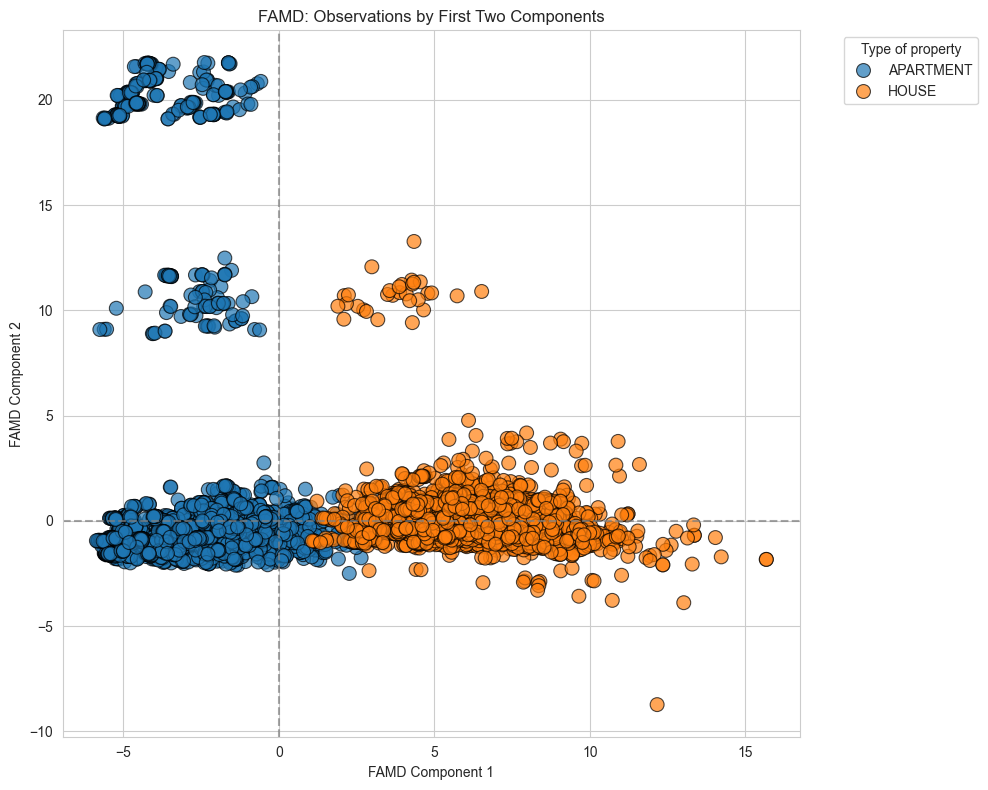

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince

# Assuming 'df' is your DataFrame and the last few columns contain numerical/categorical data
required_data = df.iloc[:, 3:]

# Perform FAMD
famd = prince.FAMD(n_components=5, random_state=42)
famd = famd.fit(required_data)

# Get factor scores (row coordinates)
row_coords = famd.row_coordinates(required_data)

# Add factor scores to the original DataFrame
for i in range(row_coords.shape[1]):
    df[f'FAMD_Component_{i+1}'] = row_coords[i]

# Example: Visualization of observations with a categorical variable
categorical_variable = 'Type of property'  # Replace with the name of your categorical variable

# Scatterplot of the first two components, colored by the categorical variable
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df, 
    x='FAMD_Component_1', 
    y='FAMD_Component_2', 
    hue=categorical_variable, 
    palette='tab10', 
    s=100, 
    alpha=0.7, 
    edgecolor='k'
)
plt.axhline(0, linestyle='--', color='gray', alpha=0.7)
plt.axvline(0, linestyle='--', color='gray', alpha=0.7)
plt.title('FAMD: Observations by First Two Components')
plt.xlabel('FAMD Component 1')
plt.ylabel('FAMD Component 2')
plt.legend(title=categorical_variable, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
